In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

After the imports, we need to either download the data and read it separately or use
sklearn’s built-in function that provides us with the MNIST dataset.

In [2]:
data = datasets.fetch_openml(
 'mnist_784',
 version=1,
 return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

There are 70000
different images, each of size 28x28 pixels. Flattening 28x28 gives 784 data points.

In [4]:
pixel_values.shape

(70000, 784)

We can visualize the samples in this dataset by reshaping them to their original
shape and then plotting them using matplotlib.

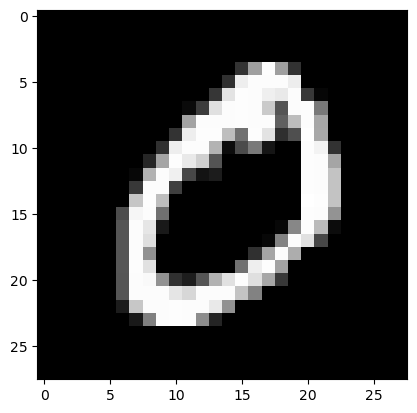

In [11]:
single_image = np.array(pixel_values)[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

This step creates the t-SNE transformation of the data. We use only two components
as we can visualize them well in a two-dimensional setting. The transformed_data,
in this case, is an array of shape 3000x2 (3000 rows and 2 columns)

In [13]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(np.array(pixel_values)[:3000, :])

c:\Users\raosw\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\raosw\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\raosw\Anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\raosw\Anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\raosw\Anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [14]:
transformed_data.shape

(3000, 2)

In [18]:
tsne_df = pd.DataFrame(
                        np.column_stack((transformed_data, targets[:3000])),
                        columns=["x", "y", "targets"]
                        )
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

C:\Users\raosw\AppData\Local\Temp\ipykernel_16108\1311499719.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)


In [20]:
tsne_df.head(10)

,x,y,targets
0,17.732224,-8.126384,5
1,55.563534,-2.874698,0
2,0.917031,-52.503574,4
3,-43.211109,8.913932,1
4,-8.731509,-30.914829,9
5,-3.954268,28.077761,2
6,-24.192781,43.116024,1
7,9.493815,13.463858,3
8,-23.428040,37.555389,1
9,-13.483481,-14.376395,4


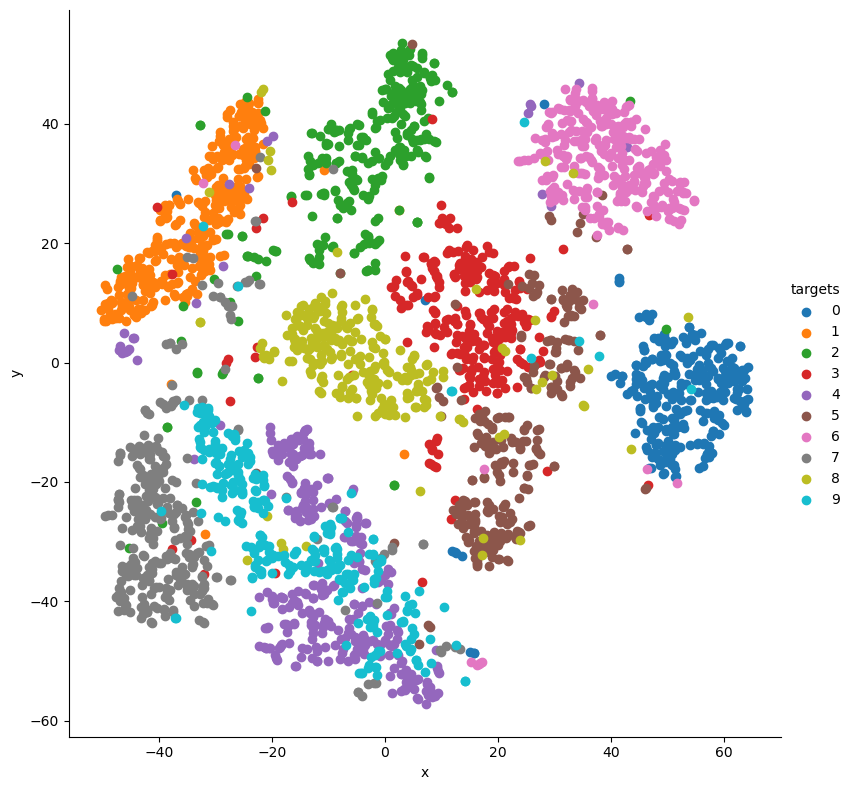

In [23]:
grid = sns.FacetGrid(tsne_df, hue="targets",height=8)
grid.map(plt.scatter, "x", "y").add_legend()